In [ ]:
!pip install yfinance

##IMPORTING REQUIRED MODULES

In [3]:
import pandas as pd
import numpy as np
import yfinance as yf # this is api
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from plotly.graph_objs import Line

## WEB SCRAPING


In [4]:
ticker = yf.Ticker('RELIANCE.NS') # Reliance Stock

In [5]:
df = ticker.history(period='max')

In [6]:
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1996-01-01,10.471229,10.527416,10.402272,10.509539,48051995,0.0,0.0
1996-01-02,10.483999,10.535078,10.351193,10.427812,77875009,0.0,0.0
1996-01-03,10.598925,11.081623,10.483997,10.506983,96602936,0.0,0.0
1996-01-04,10.407378,10.440580,10.269464,10.409932,100099436,0.0,0.0
1996-01-05,10.369071,10.369071,10.249035,10.338424,76935930,0.0,0.0
...,...,...,...,...,...,...,...
2022-05-27,2593.050049,2605.149902,2540.100098,2575.100098,7624888,0.0,0.0
2022-05-30,2615.000000,2674.000000,2594.199951,2664.800049,6393341,0.0,0.0
2022-05-31,2641.399902,2678.800049,2615.699951,2632.649902,32591420,0.0,0.0


In [7]:
ticker.info

{'52WeekChange': 0.19181776,
 'SandP52WeekChange': -0.02185148,
 'address1': 'Maker Chambers IV',
 'address2': '3rd Floor 222 Nariman Point',
 'algorithm': None,
 'annualHoldingsTurnover': None,
 'annualReportExpenseRatio': None,
 'ask': 2701.25,
 'askSize': 0,
 'averageDailyVolume10Day': 9536541,
 'averageVolume': 7576485,
 'averageVolume10days': 9536541,
 'beta': 0.955614,
 'beta3Year': None,
 'bid': 2699.4,
 'bidSize': 0,
 'bookValue': 1132.233,
 'category': None,
 'circulatingSupply': None,
 'city': 'Mumbai',
 'companyOfficers': [],
 'country': 'India',
 'currency': 'INR',
 'currentPrice': 2699.9,
 'currentRatio': None,
 'dateShortInterest': None,
 'dayHigh': 2707.4,
 'dayLow': 2634,
 'debtToEquity': 31.21,
 'dividendRate': 7,
 'dividendYield': 0.0027,
 'earningsGrowth': 0.393,
 'earningsQuarterlyGrowth': 0.416,
 'ebitda': 994277523456,
 'ebitdaMargins': 0.15483,
 'enterpriseToEbitda': 18.441,
 'enterpriseToRevenue': 2.855,
 'enterpriseValue': 18335190220800,
 'exDividendDate': 162

##DATA ENGINEERING (Reliance Data)

In [ ]:
df.shape  #6644 Rows and 7 Columns

(6644, 7)

In [ ]:
df.info()  #This tells us that there is no 'NULL' present in the dataset. Can also check from df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6644 entries, 1996-01-01 to 2022-06-01
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          6644 non-null   float64
 1   High          6644 non-null   float64
 2   Low           6644 non-null   float64
 3   Close         6644 non-null   float64
 4   Volume        6644 non-null   int64  
 5   Dividends     6644 non-null   float64
 6   Stock Splits  6644 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 415.2 KB


In [ ]:
#Null Check
df.isnull().sum()

In [ ]:
df.dtypes  #Date is coming as index. So we need to add index column

Open            float64
High            float64
Low             float64
Close           float64
Volume            int64
Dividends       float64
Stock Splits    float64
dtype: object

In [8]:
df['Date'] = df.index
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Date
Date,,,,,,,,
1996-01-01,10.471229,10.527416,10.402272,10.509539,48051995,0.0,0.0,1996-01-01
1996-01-02,10.483999,10.535078,10.351193,10.427812,77875009,0.0,0.0,1996-01-02
1996-01-03,10.598925,11.081623,10.483997,10.506983,96602936,0.0,0.0,1996-01-03
1996-01-04,10.407378,10.440580,10.269464,10.409932,100099436,0.0,0.0,1996-01-04
1996-01-05,10.369071,10.369071,10.249035,10.338424,76935930,0.0,0.0,1996-01-05
...,...,...,...,...,...,...,...,...
2022-05-27,2593.050049,2605.149902,2540.100098,2575.100098,7624888,0.0,0.0,2022-05-27
2022-05-30,2615.000000,2674.000000,2594.199951,2664.800049,6393341,0.0,0.0,2022-05-30
2022-05-31,2641.399902,2678.800049,2615.699951,2632.649902,32591420,0.0,0.0,2022-05-31


In [9]:
#Correcting the Column Order and resetting index
df = df[['Date','Open','High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits']]
df.reset_index(inplace = True, drop = True)
df

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,1996-01-01,10.471229,10.527416,10.402272,10.509539,48051995,0.0,0.0
1,1996-01-02,10.483999,10.535078,10.351193,10.427812,77875009,0.0,0.0
2,1996-01-03,10.598925,11.081623,10.483997,10.506983,96602936,0.0,0.0
3,1996-01-04,10.407378,10.440580,10.269464,10.409932,100099436,0.0,0.0
4,1996-01-05,10.369071,10.369071,10.249035,10.338424,76935930,0.0,0.0
...,...,...,...,...,...,...,...,...
6640,2022-05-27,2593.050049,2605.149902,2540.100098,2575.100098,7624888,0.0,0.0
6641,2022-05-30,2615.000000,2674.000000,2594.199951,2664.800049,6393341,0.0,0.0
6642,2022-05-31,2641.399902,2678.800049,2615.699951,2632.649902,32591420,0.0,0.0
6643,2022-06-01,2634.300049,2655.199951,2616.199951,2633.500000,4512079,0.0,0.0


In [ ]:
#Descriptive Statistics
df.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,6644.000000,6644.000000,6644.000000,6644.000000,6.644000e+03,6644.000000,6644.000000
mean,480.881816,486.870253,474.450019,480.421433,2.959230e+07,0.012776,0.000903
std,600.848244,607.759420,593.474490,600.332165,4.891784e+07,0.240089,0.042492
min,7.815111,7.850866,7.766586,7.850866,0.000000e+00,0.000000,0.000000
25%,40.119102,40.810971,39.542784,40.105237,6.896395e+06,0.000000,0.000000
50%,372.117518,377.547124,367.352782,372.333237,1.276836e+07,0.000000,0.000000
75%,497.758340,504.039439,490.665609,496.942932,3.170501e+07,0.000000,0.000000
max,2856.149902,2856.149902,2786.100098,2819.850098,6.686620e+08,7.000000,2.000000


In [10]:
#Adding few columns for Data Analysis
df['Open-High'] = df['Open'] - df['High']
df['Open-Low'] = df['Open'] - df['Low']
df['Close-High'] = df['Close'] - df['High']
df['Close-Low'] = df['Close'] - df['Low']
df['High-Low'] = df['High'] - df['Low']
df['Open-Close'] = df['Open'] - df['Close']

df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Open-High,Open-Low,Close-High,Close-Low,High-Low,Open-Close
0,1996-01-01,10.471229,10.527416,10.402272,10.509539,48051995,0.0,0.0,-0.056187,0.068957,-0.017877,0.107267,0.125144,-0.038310
1,1996-01-02,10.483999,10.535078,10.351193,10.427812,77875009,0.0,0.0,-0.051079,0.132806,-0.107266,0.076619,0.183885,0.056187
2,1996-01-03,10.598925,11.081623,10.483997,10.506983,96602936,0.0,0.0,-0.482698,0.114928,-0.574641,0.022986,0.597627,0.091943
3,1996-01-04,10.407378,10.440580,10.269464,10.409932,100099436,0.0,0.0,-0.033202,0.137914,-0.030648,0.140468,0.171115,-0.002554
4,1996-01-05,10.369071,10.369071,10.249035,10.338424,76935930,0.0,0.0,0.000000,0.120036,-0.030648,0.089389,0.120036,0.030648
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6640,2022-05-27,2593.050049,2605.149902,2540.100098,2575.100098,7624888,0.0,0.0,-12.099854,52.949951,-30.049805,35.000000,65.049805,17.949951
6641,2022-05-30,2615.000000,2674.000000,2594.199951,2664.800049,6393341,0.0,0.0,-59.000000,20.800049,-9.199951,70.600098,79.800049,-49.800049
6642,2022-05-31,2641.399902,2678.800049,2615.699951,2632.649902,32591420,0.0,0.0,-37.400146,25.699951,-46.150146,16.949951,63.100098,8.750000
6643,2022-06-01,2634.300049,2655.199951,2616.199951,2633.500000,4512079,0.0,0.0,-20.899902,18.100098,-21.699951,17.300049,39.000000,0.800049


In [11]:
#Lets add a feature AvgPrice as (O + H + L + C) / 4
values = (df['High'] + df['Low'] + df['Open'] + df['Close'])/4
df = df.assign(AvgPrice = values)
df

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Open-High,Open-Low,Close-High,Close-Low,High-Low,Open-Close,AvgPrice
0,1996-01-01,10.471229,10.527416,10.402272,10.509539,48051995,0.0,0.0,-0.056187,0.068957,-0.017877,0.107267,0.125144,-0.038310,10.477614
1,1996-01-02,10.483999,10.535078,10.351193,10.427812,77875009,0.0,0.0,-0.051079,0.132806,-0.107266,0.076619,0.183885,0.056187,10.449520
2,1996-01-03,10.598925,11.081623,10.483997,10.506983,96602936,0.0,0.0,-0.482698,0.114928,-0.574641,0.022986,0.597627,0.091943,10.667882
3,1996-01-04,10.407378,10.440580,10.269464,10.409932,100099436,0.0,0.0,-0.033202,0.137914,-0.030648,0.140468,0.171115,-0.002554,10.381839
4,1996-01-05,10.369071,10.369071,10.249035,10.338424,76935930,0.0,0.0,0.000000,0.120036,-0.030648,0.089389,0.120036,0.030648,10.331400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6640,2022-05-27,2593.050049,2605.149902,2540.100098,2575.100098,7624888,0.0,0.0,-12.099854,52.949951,-30.049805,35.000000,65.049805,17.949951,2578.350037
6641,2022-05-30,2615.000000,2674.000000,2594.199951,2664.800049,6393341,0.0,0.0,-59.000000,20.800049,-9.199951,70.600098,79.800049,-49.800049,2637.000000
6642,2022-05-31,2641.399902,2678.800049,2615.699951,2632.649902,32591420,0.0,0.0,-37.400146,25.699951,-46.150146,16.949951,63.100098,8.750000,2642.137451
6643,2022-06-01,2634.300049,2655.199951,2616.199951,2633.500000,4512079,0.0,0.0,-20.899902,18.100098,-21.699951,17.300049,39.000000,0.800049,2634.799988


In [ ]:
df.AvgPrice.describe()

count    6644.000000
mean      480.655880
std       600.571286
min         7.850866
25%        40.079512
50%       372.505926
75%       497.245880
max      2819.962463
Name: AvgPrice, dtype: float64

In [12]:
#Calculating Growth Column (Essentially means how much growth has happened for each day from 1st Day Average Price)

df['Stock'] = 'Reliance'
stock_names = df.Stock.unique()

day1_price = df[df.Date == df.Date.min()].AvgPrice  #Day 1 Average Price

price_mapping = {n : c for n, c in zip(stock_names, day1_price)}
base_mapping = np.array(list(map(lambda x : price_mapping[x], df['Stock'].values)))

df['Growth'] = df['AvgPrice'] / base_mapping - 1

df

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Open-High,Open-Low,Close-High,Close-Low,High-Low,Open-Close,AvgPrice,Stock,Growth
0,1996-01-01,10.471229,10.527416,10.402272,10.509539,48051995,0.0,0.0,-0.056187,0.068957,-0.017877,0.107267,0.125144,-0.038310,10.477614,Reliance,0.000000
1,1996-01-02,10.483999,10.535078,10.351193,10.427812,77875009,0.0,0.0,-0.051079,0.132806,-0.107266,0.076619,0.183885,0.056187,10.449520,Reliance,-0.002681
2,1996-01-03,10.598925,11.081623,10.483997,10.506983,96602936,0.0,0.0,-0.482698,0.114928,-0.574641,0.022986,0.597627,0.091943,10.667882,Reliance,0.018159
3,1996-01-04,10.407378,10.440580,10.269464,10.409932,100099436,0.0,0.0,-0.033202,0.137914,-0.030648,0.140468,0.171115,-0.002554,10.381839,Reliance,-0.009141
4,1996-01-05,10.369071,10.369071,10.249035,10.338424,76935930,0.0,0.0,0.000000,0.120036,-0.030648,0.089389,0.120036,0.030648,10.331400,Reliance,-0.013955
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6640,2022-05-27,2593.050049,2605.149902,2540.100098,2575.100098,7624888,0.0,0.0,-12.099854,52.949951,-30.049805,35.000000,65.049805,17.949951,2578.350037,Reliance,245.081794
6641,2022-05-30,2615.000000,2674.000000,2594.199951,2664.800049,6393341,0.0,0.0,-59.000000,20.800049,-9.199951,70.600098,79.800049,-49.800049,2637.000000,Reliance,250.679439
6642,2022-05-31,2641.399902,2678.800049,2615.699951,2632.649902,32591420,0.0,0.0,-37.400146,25.699951,-46.150146,16.949951,63.100098,8.750000,2642.137451,Reliance,251.169765
6643,2022-06-01,2634.300049,2655.199951,2616.199951,2633.500000,4512079,0.0,0.0,-20.899902,18.100098,-21.699951,17.300049,39.000000,0.800049,2634.799988,Reliance,250.469466


In [13]:
df.Growth.describe()  #Tells us that Reliance grew by 26814% from its listing price 

count    6645.000000
mean       44.905985
std        57.372392
min        -0.250701
25%         2.825426
50%        34.556145
75%        46.460957
max       268.141665
Name: Growth, dtype: float64

In [67]:
price_mapping 
base_mapping

array([10.47761396, 10.47761396, 10.47761396, ..., 10.47761396,
       10.47761396, 10.47761396])

##DATA VISUALIZATION

In [ ]:
#OHLC LINE PLOTS
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from plotly.graph_objs import Line

fig = make_subplots(rows=7, cols=1,subplot_titles=('Open','High','Low','Close','Volume','Dividends','Stock Splits','AvgPrice'))

fig.add_trace(
    Line(x=df.Date, y=df.Open),
    row=1, col=1
)

fig.add_trace(
    Line(x=df.Date, y=df.High),
    row=2, col=1
)

fig.add_trace(
    Line(x=df.Date, y=df.Low),
    row=3, col=1
)

fig.add_trace(
    go.Line(x=df.Date, y=df.Close),
    row=4, col=1
)

fig.add_trace(
    go.Line(x=df.Date, y=df.Volume),
    row=5, col=1
)

fig.add_trace(
    go.Line(x=df.Date, y=df.Dividends),
    row=6, col=1
)

fig.add_trace(
    go.Line(x=df.Date, y=df['Stock Splits']),
    row=7, col=1
)

fig.add_trace(
    go.Line(x=df.Date, y=df['AvgPrice']),
    row=7, col=1
)

fig.update_layout(height=1400, width=1000, title_text="OHLC Line Plots")

fig.show()

/usr/local/lib/python3.7/dist-packages/plotly/graph_objs/_deprecations.py:385: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




In [ ]:
#CandleStick Chart
import plotly.graph_objects as go

import pandas as pd
from datetime import datetime


fig = go.Figure(data=[go.Candlestick(x=df.Date,
                open=df['Open'],
                high=df['High'],
                low=df['Low'],
                close=df['Close'])])

fig.update_layout(
    title='Reliance Stock Chart',
    yaxis_title='RELIANCE.NS'

)


fig.show()

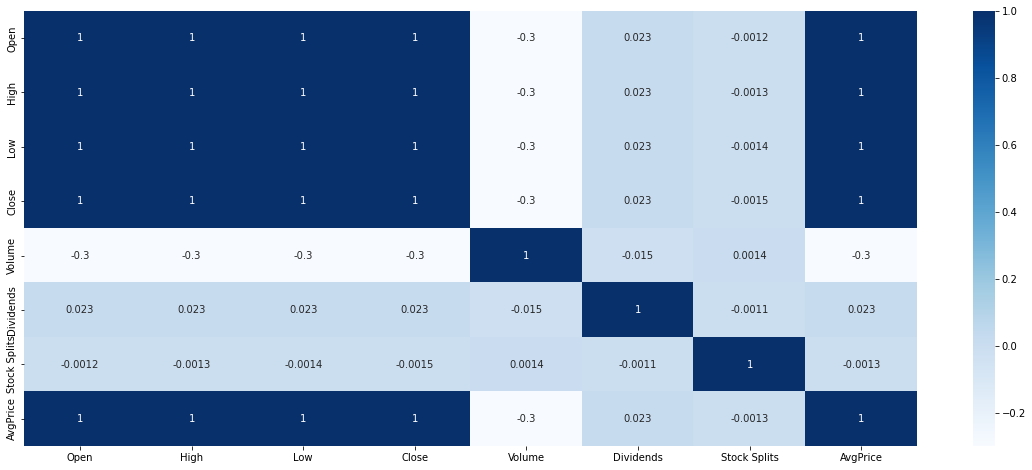

In [18]:
#Correlation using Original Dataset
import matplotlib.pyplot as plt
import seaborn as sns

df2 = df[['Open','High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits','AvgPrice']]
plt.figure(figsize=(20,8))
sns.heatmap(df2.corr(),cmap='Blues',annot=True)

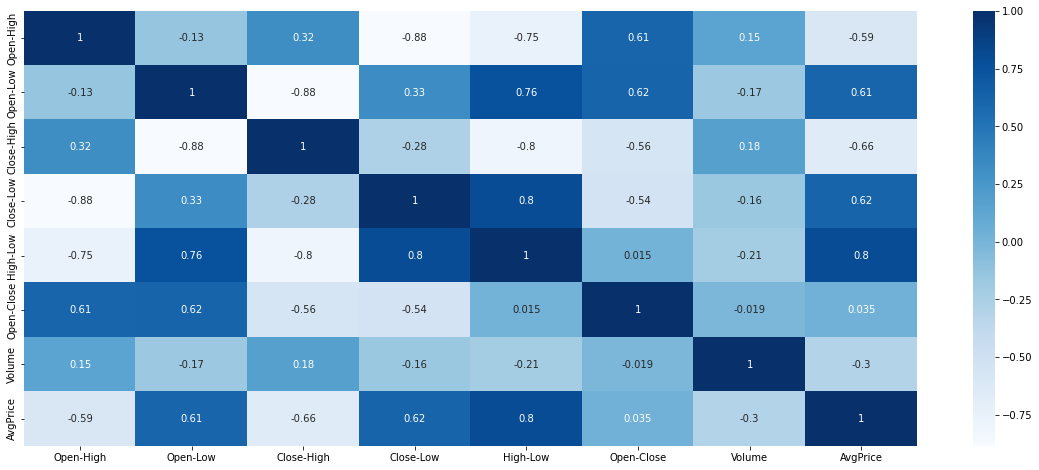

In [19]:
#Correlation among added columns
df3 = df[['Open-High','Open-Low', 'Close-High', 'Close-Low', 'High-Low', 'Open-Close','Volume','AvgPrice']]
plt.figure(figsize=(20,8))
sns.heatmap(df3.corr(),cmap='Blues',annot=True)


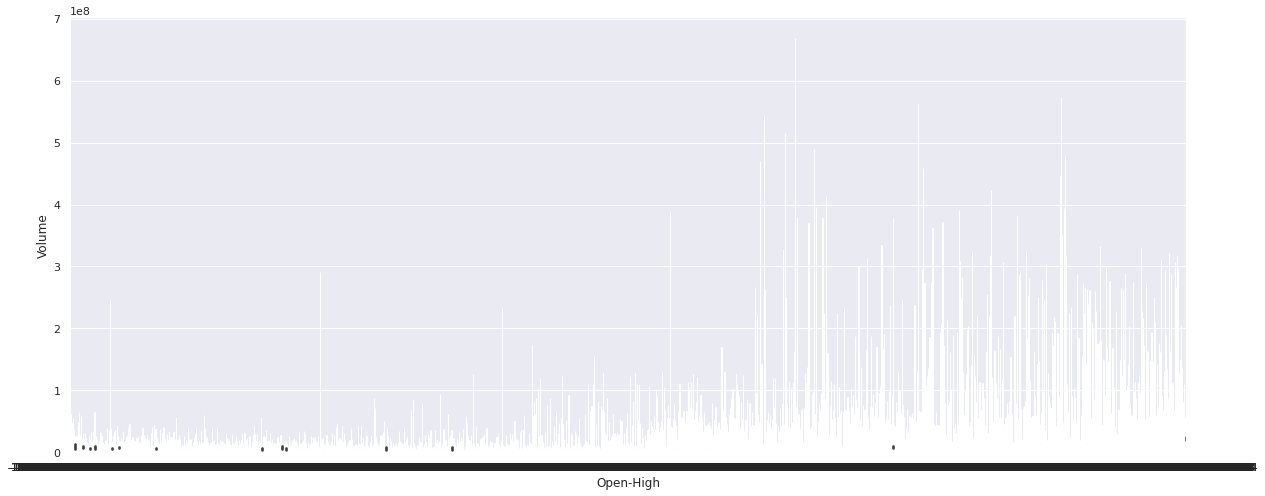

In [22]:
sns.barplot(data = df, x = "Open-High", y="Volume")

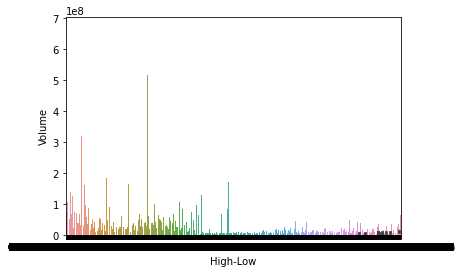

In [ ]:
sns.barplot(data=df, x = "High-Low", y="Volume")

In [33]:
#Moving Average Analysis of Reliance
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in stock_names:
        column_name = f"MA for {ma} days"
        df[column_name] = df['Close'].rolling(ma).mean()

df

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Open-High,Open-Low,Close-High,Close-Low,High-Low,Open-Close,AvgPrice,Stock,Growth,MA for 10 days,MA for 20 days,MA for 50 days
0,1996-01-01,10.471229,10.527416,10.402272,10.509539,48051995,0.0,0.0,-0.056187,0.068957,-0.017877,0.107267,0.125144,-0.038310,10.477614,Reliance,0.000000,NaN,NaN,NaN
1,1996-01-02,10.483999,10.535078,10.351193,10.427812,77875009,0.0,0.0,-0.051079,0.132806,-0.107266,0.076619,0.183885,0.056187,10.449520,Reliance,-0.002681,NaN,NaN,NaN
2,1996-01-03,10.598925,11.081623,10.483997,10.506983,96602936,0.0,0.0,-0.482698,0.114928,-0.574641,0.022986,0.597627,0.091943,10.667882,Reliance,0.018159,NaN,NaN,NaN
3,1996-01-04,10.407378,10.440580,10.269464,10.409932,100099436,0.0,0.0,-0.033202,0.137914,-0.030648,0.140468,0.171115,-0.002554,10.381839,Reliance,-0.009141,NaN,NaN,NaN
4,1996-01-05,10.369071,10.369071,10.249035,10.338424,76935930,0.0,0.0,0.000000,0.120036,-0.030648,0.089389,0.120036,0.030648,10.331400,Reliance,-0.013955,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6640,2022-05-27,2593.050049,2605.149902,2540.100098,2575.100098,7624888,0.0,0.0,-12.099854,52.949951,-30.049805,35.000000,65.049805,17.949951,2578.350037,Reliance,245.081794,2559.595020,2569.504993,2597.838999
6641,2022-05-30,2615.000000,2674.000000,2594.199951,2664.800049,6393341,0.0,0.0,-59.000000,20.800049,-9.199951,70.600098,79.800049,-49.800049,2637.000000,Reliance,250.679439,2583.355029,2563.232495,2603.866001
6642,2022-05-31,2641.399902,2678.800049,2615.699951,2632.649902,32591420,0.0,0.0,-37.400146,25.699951,-46.150146,16.949951,63.100098,8.750000,2642.137451,Reliance,251.169765,2593.705029,2555.842493,2608.451997
6643,2022-06-01,2634.300049,2655.199951,2616.199951,2633.500000,4512079,0.0,0.0,-20.899902,18.100098,-21.699951,17.300049,39.000000,0.800049,2634.799988,Reliance,250.469466,2603.220020,2552.834998,2611.487998


In [43]:
#Conversion done for plotting Moving Average Chart
df.dtypes
df['Date'] = df['Date'].astype(str)

Text(0, 0.5, 'Reliance Stock')

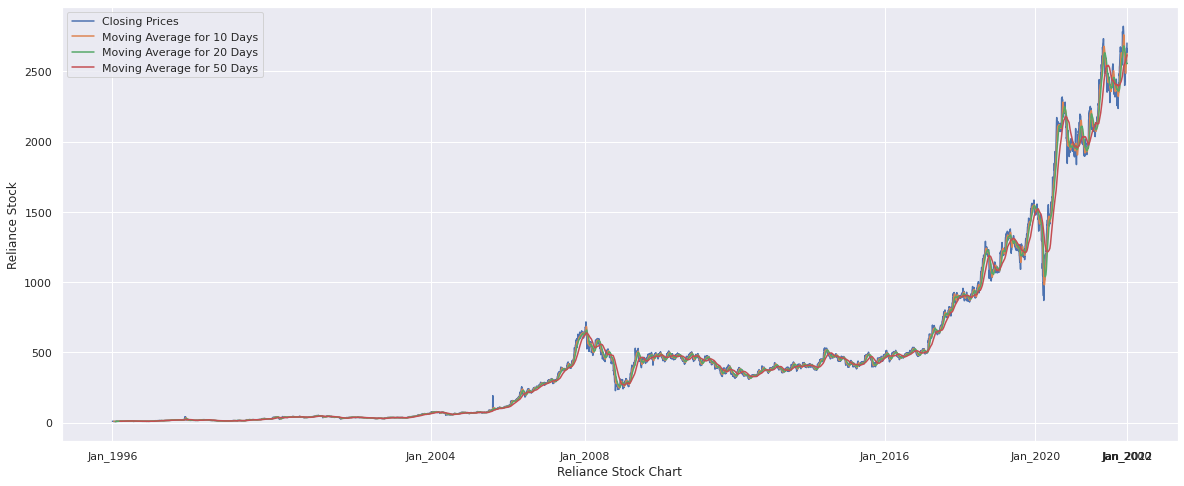

In [46]:
#Plotting Moving Average Graph
# set figure size
plt.figure( figsize = (20, 8))
  
# plot a simple time series plot
# using seaborn.lineplot()
sns.lineplot( x = 'Date',
             y = 'Close',
             data = df,
             label = 'Closing Prices')
  
# plot using rolling average
sns.lineplot( x = 'Date',
             y = 'MA for 10 days',
             data = df,
             label = 'Moving Average for 10 Days')

# plot using rolling average
sns.lineplot( x = 'Date',
             y = 'MA for 20 days',
             data = df,
             label = 'Moving Average for 20 Days')

# plot using rolling average
sns.lineplot( x = 'Date',
             y = 'MA for 50 days',
             data = df,
             label = 'Moving Average for 50 Days')
  
plt.xlabel('Reliance Stock Chart')
  
# setting customized ticklabels for x axis
pos = [ '1996-01-01', '2000-01-01', '2004-01-01', '2008-01-01', 
       '2012-01-01', '2016-01-01', '2020-01-01', '2022-01-01']
  

lab = [ 'Jan_1996', 'Jan_2000', 'Jan_2004', 'Jan_2008', 
       'Jan_2012', 'Jan_2016','Jan_2020','Jan_2022']
       
  
plt.xticks( pos, lab)
  
plt.ylabel('Reliance Stock')